# Exploratory Data Analysis — Real Estate Prices (Tabular Data)

## Objective
The primary goal of this analysis is to understand the distribution, quality, and predictive potential of the tabular metadata (number of bedrooms, bathrooms, area, zipcode) to estimate house prices. This EDA serves as a foundational step before building machine learning models.

## Dataset Description
**Title:** Houses Dataset  
**Description:** This is a benchmark dataset for house prices that contains both visual and textual information. Each house is represented by four images (bedroom, bathroom, kitchen, and frontal) and textual metadata.  
**Instances:** 535  
**Attributes:**
- **Number of Bedrooms**: Count of bedrooms in the house.
- **Number of Bathrooms**: Count of bathrooms in the house.
- **Area**: Square footage of the house.
- **Zipcode**: Location identifier.
- **Price**: The target variable (house price).

**Reference:**  
H. Ahmed E. and Moustafa M. (2016). House Price Estimation from Visual and Textual Features. In Proceedings of the 8th International Joint Conference on Computational Intelligence (IJCCI 2016) ISBN 978-989-758-201-1, pages 62-68. DOI: 10.5220/0006040700620068

## Analysis Roadmap
This notebook follows a structured approach:
1.  **Data Loading & Overview**: Connecting to the database and inspecting the raw data.
2.  **Data Quality Check**: Identifying missing values and inconsistencies.
3.  **Univariate Analysis**: Understanding distributions of individual features.
4.  **Bivariate Analysis**: Exploring relationships between features and the target variable (Price).
5.  **Multivariate Analysis**: Examining complex interactions between multiple variables.
6.  **Key Findings & Recommendations**: Summarizing insights for model building.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

sns.set(style="whitegrid")

## 1. Load Data From PostgreSQL

We establish a connection to the local PostgreSQL database `real_estate` to retrieve the `propiedades` table. This simulates a real-world scenario where data is sourced from a centralized database rather than static CSV files.


In [3]:
conn = psycopg2.connect(
    host="localhost",
    port=5433,
    dbname="real_estate",
    user="admin",
    password="admin123"
)

query = "SELECT * FROM propiedades;"
df = pd.read_sql(query, conn)
conn.close()

df.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_16852\25828879.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,id,bedrooms,bathrooms,area,zipcode,price
0,1,4,4.0,4053,85255,869500
1,2,4,3.0,3343,36372,865200
2,3,3,4.0,3923,85266,889000
3,4,5,5.0,4022,85262,910000
4,5,3,4.0,4116,85266,971226


## 2. Dataset Overview

Before diving into deep analysis, we perform a high-level inspection of the dataset structure.
-   **Shape**: Verifying the number of rows (instances) and columns (features).
-   **Info**: Checking data types and non-null counts.
-   **Describe**: Getting a statistical summary (mean, std, min, max) for numerical features.


In [ ]:
#Dataset shape
df.shape

(535, 6)

In [ ]:
#Missing values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         535 non-null    int64  
 1   bedrooms   535 non-null    int64  
 2   bathrooms  535 non-null    float64
 3   area       535 non-null    int64  
 4   zipcode    535 non-null    int64  
 5   price      535 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 25.2 KB


In [ ]:
#Statistical summary of numerical columns
df.describe()

,id,bedrooms,bathrooms,area,zipcode,price
count,535.000000,535.000000,535.000000,535.000000,535.000000,5.350000e+02
mean,268.000000,3.377570,2.664953,2364.904673,90937.768224,5.893628e+05
std,154.585467,1.160952,0.995077,1224.556982,7141.857452,5.090261e+05
min,1.000000,1.000000,1.000000,701.000000,36372.000000,2.200000e+04
25%,134.500000,3.000000,2.000000,1440.000000,92276.000000,2.492000e+05
50%,268.000000,3.000000,2.500000,2078.000000,92880.000000,5.290000e+05
75%,401.500000,4.000000,3.000000,3067.500000,93510.000000,7.285000e+05
max,535.000000,10.000000,7.000000,9583.000000,98021.000000,5.858000e+06


## 3. Missing Values Analysis

Data completeness is critical for model performance. Here, we calculate the count and percentage of missing values for each feature.
-   **Goal**: Identify if imputation (filling missing values) or row/column removal is necessary.
-   **Expectation**: Based on the dataset description, we expect no missing values, but verification is mandatory.


In [11]:
# Missing values count and percentage
missing_data = pd.DataFrame({
    'Feature': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})

print("Missing Values Report:")
print(missing_data)
print(f"\nTotal records: {len(df)}")
print(f"Data completeness: {(1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")


Missing Values Report:
     Feature  Missing_Count  Missing_Percentage
0         id              0                 0.0
1   bedrooms              0                 0.0
2  bathrooms              0                 0.0
3       area              0                 0.0
4    zipcode              0                 0.0
5      price              0                 0.0

Total records: 535
Data completeness: 100.00%


## 4. Distribution Analysis by Feature

We visualize the distribution of each numerical feature using histograms and Kernel Density Estimation (KDE).
-   **Skewness**: Measures the asymmetry of the distribution.
    -   *Positive Skew*: Tail on the right (common in prices and areas).
    -   *Negative Skew*: Tail on the left.
-   **Kurtosis**: Measures the "tailedness" of the distribution.
-   **Insight**: Highly skewed features may require transformations (like Log or Box-Cox) to satisfy the normality assumptions of some machine learning algorithms (e.g., Linear Regression).


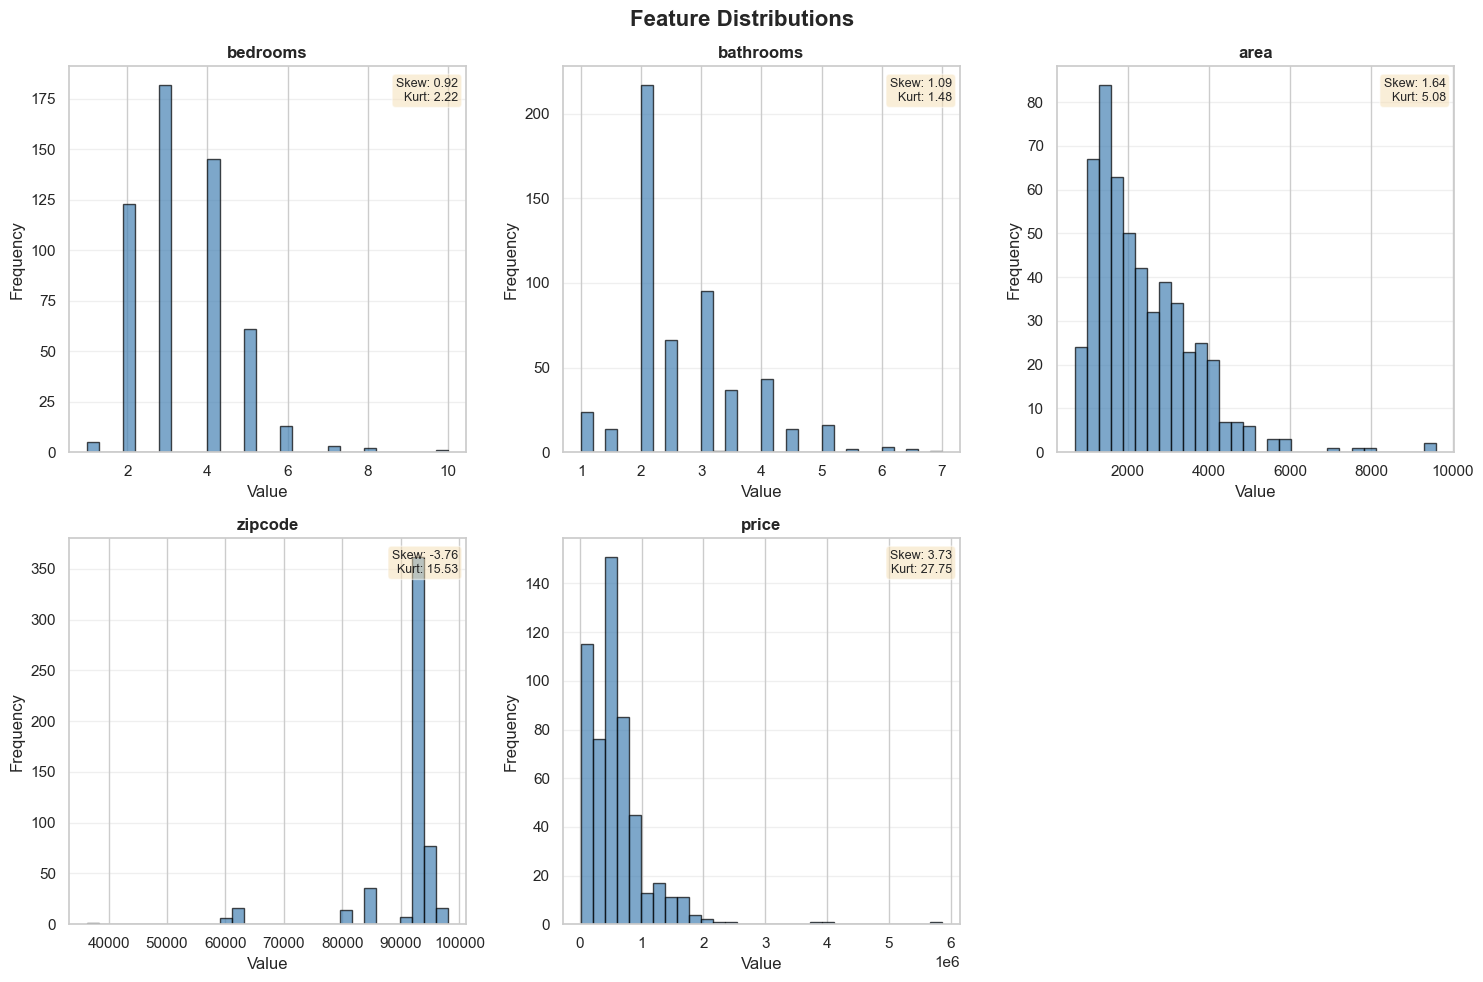


Skewness Analysis:
bedrooms     0.915318
bathrooms    1.091190
area         1.642034
zipcode     -3.761110
price        3.729643
dtype: float64


In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions', fontsize=16, fontweight='bold')

# Exclude 'id' column
numerical_features = df.select_dtypes(include=[np.number]).columns.drop('id')

for idx, col in enumerate(numerical_features):
    ax = axes.flatten()[idx]
    
    # Histogram with KDE
    ax.hist(df[col], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.3)
    
    # Add statistics annotation
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    stats_text = f'Skew: {skew:.2f}\nKurt: {kurt:.2f}'
    ax.text(0.98, 0.97, stats_text, transform=ax.transAxes, 
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5), fontsize=9)

# Remove empty subplot
axes.flatten()[-1].remove()

plt.tight_layout()
plt.show()

print("\nSkewness Analysis:")
print(df[numerical_features].skew())


## 5. Outlier Detection & Analysis (IQR Method)

Outliers are extreme values that deviate significantly from other observations. They can distort statistical analyses and model training.
-   **Method**: We use the Interquartile Range (IQR) method.
    -   *IQR* = Q3 (75th percentile) - Q1 (25th percentile).
    -   *Outliers*: Values < (Q1 - 1.5 * IQR) or > (Q3 + 1.5 * IQR).
-   **Visualization**: Boxplots provide a clear visual representation of the spread and outliers for each feature.


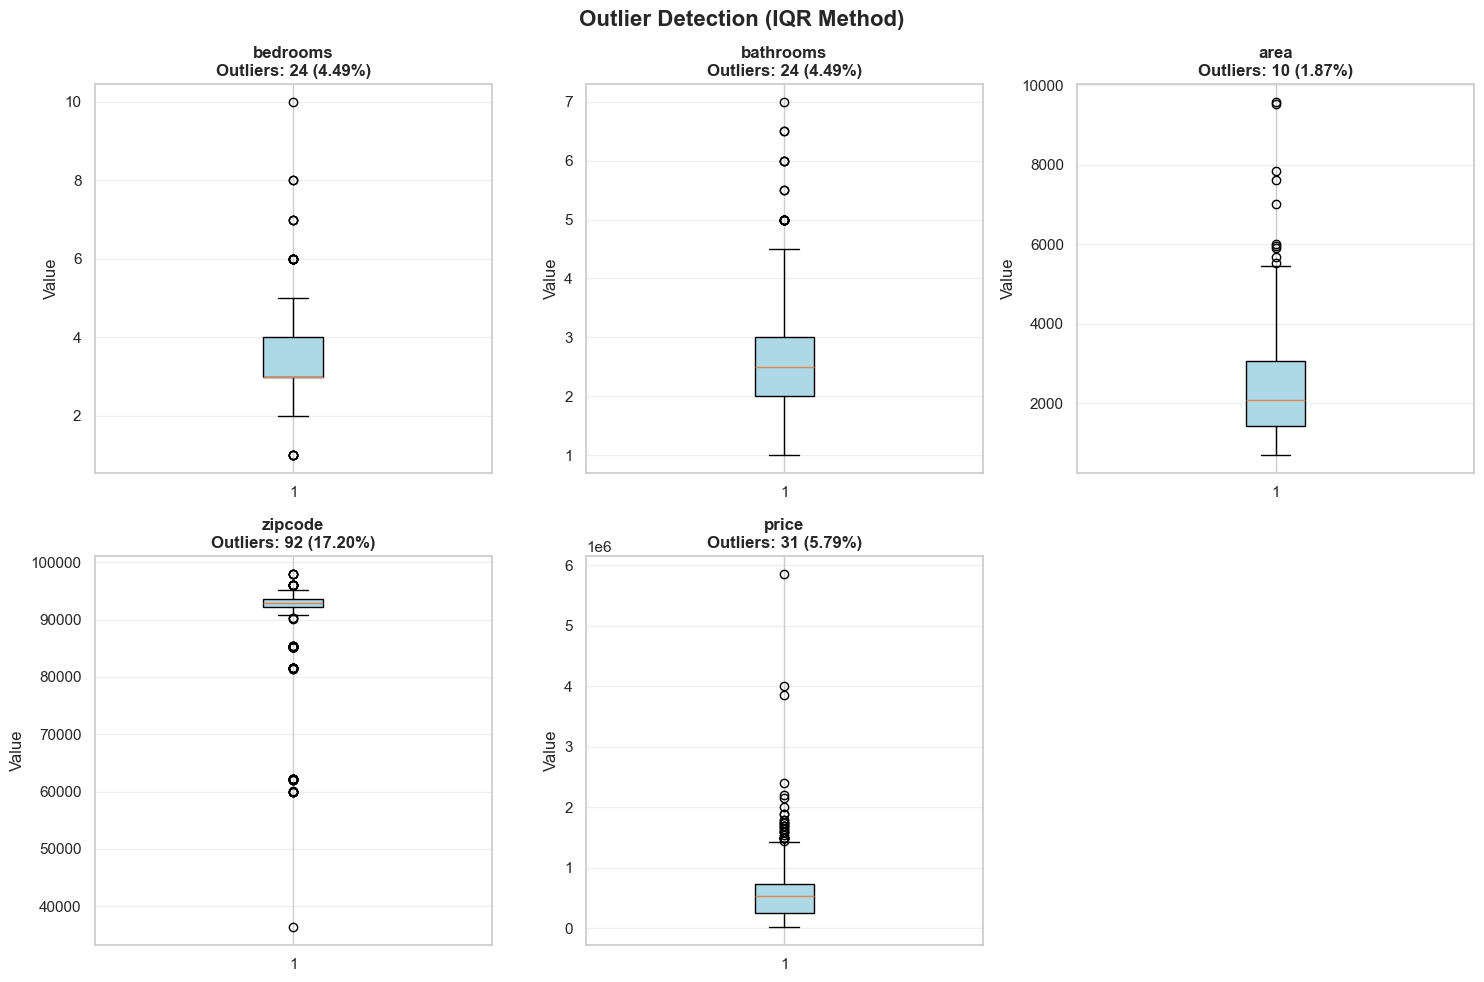


Outlier Summary (IQR Method):
           count  percentage  lower_bound  upper_bound
bedrooms    24.0    4.485981         1.50         5.50
bathrooms   24.0    4.485981         0.50         4.50
area        10.0    1.869159     -1001.25      5508.75
zipcode     92.0   17.196262     90425.00     95361.00
price       31.0    5.794393   -469750.00   1447450.00


In [13]:
# IQR-based outlier detection
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Outlier Detection (IQR Method)', fontsize=16, fontweight='bold')

outlier_summary = {}

for idx, col in enumerate(numerical_features):
    ax = axes.flatten()[idx]
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    outlier_summary[col] = {
        'count': outlier_count,
        'percentage': outlier_pct,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    # Boxplot
    bp = ax.boxplot(df[col], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    ax.set_title(f'{col}\nOutliers: {outlier_count} ({outlier_pct:.2f}%)', fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(axis='y', alpha=0.3)

axes.flatten()[-1].remove()
plt.tight_layout()
plt.show()

print("\nOutlier Summary (IQR Method):")
outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)


## 6. Correlation Analysis

We examine the linear relationships between numerical features and the target variable (`price`).
-   **Correlation Matrix**: A heatmap displaying Pearson correlation coefficients (ranging from -1 to 1).
    -   *1*: Perfect positive correlation.
    -   *-1*: Perfect negative correlation.
    -   *0*: No linear correlation.
-   **Goal**: Identify which features are strong predictors of Price and check for **Multicollinearity** (high correlation between independent features), which can be problematic for linear models.


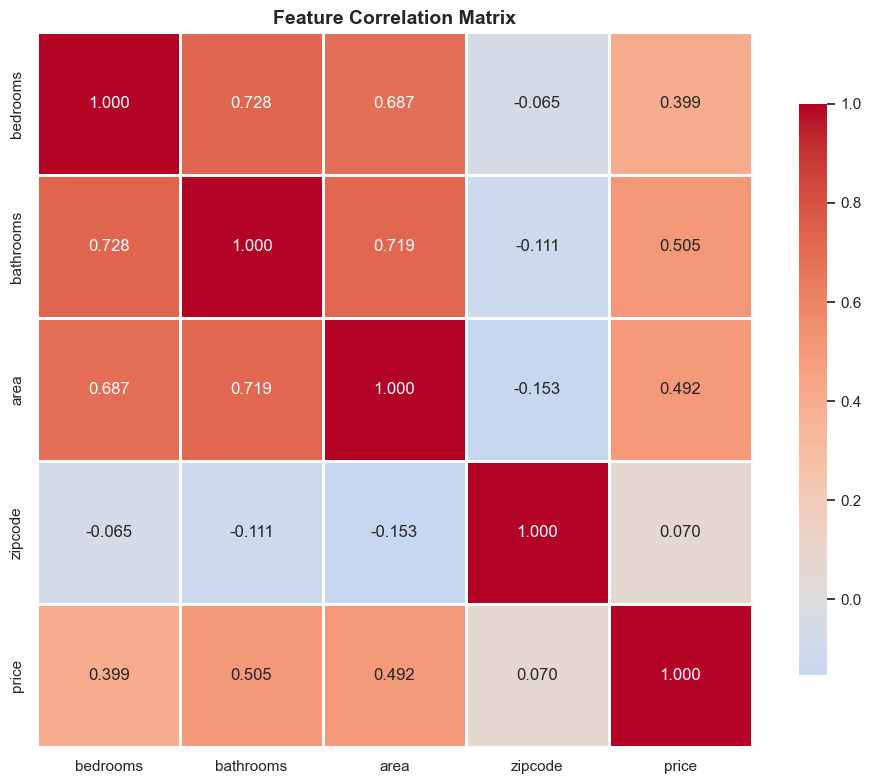


Correlation with Price (Target Variable):
price        1.000000
bathrooms    0.505018
area         0.491725
bedrooms     0.398655
zipcode      0.070073
Name: price, dtype: float64


In [14]:
# Correlation Matrix
corr_matrix = df[numerical_features].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with price (target variable)
print("\nCorrelation with Price (Target Variable):")
price_corr = corr_matrix['price'].sort_values(ascending=False)
print(price_corr)


## 7. Feature-Target Relationships

Scatter plots allow us to visualize the direct relationship between each feature and the `price`.
-   **Trend Line**: A regression line is added to visualize the general direction of the relationship.
-   **Insight**: We look for linear patterns, non-linear relationships, or heteroscedasticity (varying spread of residuals) which might suggest the need for feature engineering.


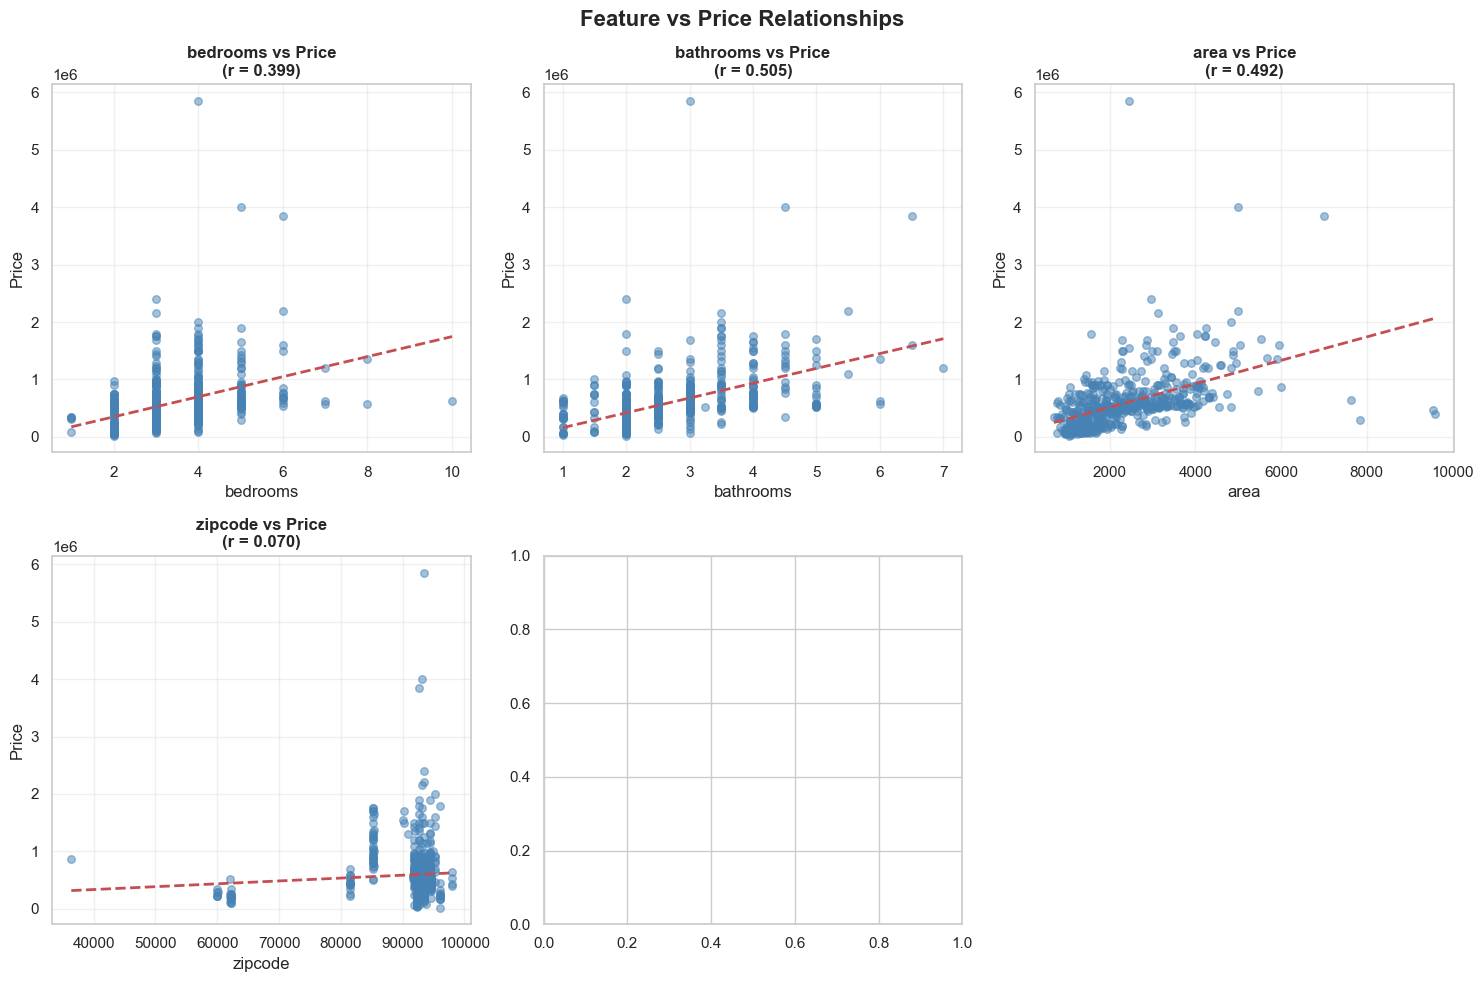

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature vs Price Relationships', fontsize=16, fontweight='bold')

feature_cols = [col for col in numerical_features if col != 'price']

for idx, col in enumerate(feature_cols):
    ax = axes.flatten()[idx]
    
    # Scatter plot with trend line
    ax.scatter(df[col], df['price'], alpha=0.5, s=30, color='steelblue')
    
    # Add trend line
    z = np.polyfit(df[col], df['price'], 1)
    p = np.poly1d(z)
    ax.plot(df[col].sort_values(), p(df[col].sort_values()), "r--", linewidth=2, label='Trend')
    
    # Correlation coefficient
    corr = df[col].corr(df['price'])
    ax.set_title(f'{col} vs Price\n(r = {corr:.3f})', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.grid(alpha=0.3)

axes.flatten()[-1].remove()
plt.tight_layout()
plt.show()


## 8. Price Distribution Analysis (Target Variable)

The target variable, `price`, requires special attention.
-   **Normality Check**: We use a Histogram and Q-Q Plot to check if the price follows a normal distribution.
-   **Log Transformation**: Since financial data is often right-skewed, we test if a log transformation (`log10(price)`) results in a more normal distribution.
-   **Statistical Test**: The Shapiro-Wilk test provides a formal p-value for normality.


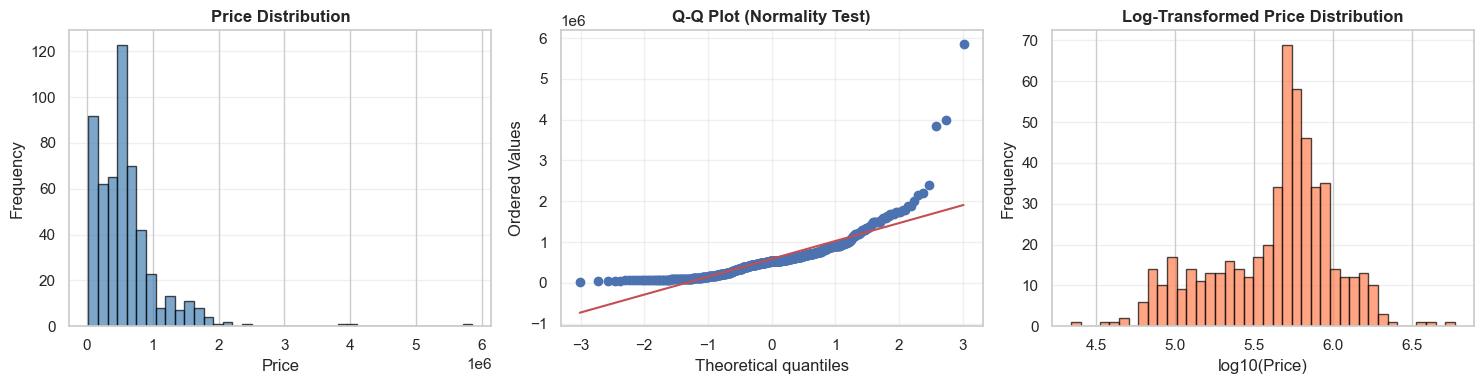


Price Statistics:
Mean: $589,362.81
Median: $529,000.00
Std Dev: $509,026.07
Min: $22,000.00
Max: $5,858,000.00
Skewness: 3.730
Kurtosis: 27.747

Shapiro-Wilk Test p-value: 0.000000
Result: Data is NOT normally distributed


In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram
axes[0].hist(df['price'], bins=40, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Price Distribution', fontweight='bold')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.3)

# Q-Q Plot
from scipy import stats
stats.probplot(df['price'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot (Normality Test)', fontweight='bold')
axes[1].grid(alpha=0.3)

# Log-transformed histogram
axes[2].hist(np.log10(df['price']), bins=40, color='coral', edgecolor='black', alpha=0.7)
axes[2].set_title('Log-Transformed Price Distribution', fontweight='bold')
axes[2].set_xlabel('log10(Price)')
axes[2].set_ylabel('Frequency')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nPrice Statistics:")
print(f"Mean: ${df['price'].mean():,.2f}")
print(f"Median: ${df['price'].median():,.2f}")
print(f"Std Dev: ${df['price'].std():,.2f}")
print(f"Min: ${df['price'].min():,.2f}")
print(f"Max: ${df['price'].max():,.2f}")
print(f"Skewness: {df['price'].skew():.3f}")
print(f"Kurtosis: {df['price'].kurtosis():.3f}")

# Normality test
_, p_value = stats.shapiro(df['price'].sample(min(5000, len(df))))
print(f"\nShapiro-Wilk Test p-value: {p_value:.6f}")
print("Result: Data is", "NOT normally distributed" if p_value < 0.05 else "normally distributed")


## 9. Feature Scaling and Variability

Different features have different scales (e.g., Area in thousands vs. Bedrooms in single digits).
-   **Coefficient of Variation (CV)**: Calculated as `(Std Dev / Mean) * 100`. It allows us to compare variability across features with different units.
-   **Implication**: Features with vastly different scales can bias distance-based algorithms (like KNN or SVM). This analysis confirms the need for feature scaling (e.g., Standardization or Normalization) during preprocessing.


Feature Scaling Analysis (Coefficient of Variation - CV indicates relative variability):
  Feature          Mean           Std     Min       Max     Range    CV (%)
 bedrooms      3.377570      1.160952     1.0      10.0       9.0 34.372416
bathrooms      2.664953      0.995077     1.0       7.0       6.0 37.339386
     area   2364.904673   1224.556982   701.0    9583.0    8882.0 51.780395
  zipcode  90937.768224   7141.857452 36372.0   98021.0   61649.0  7.853566
    price 589362.811215 509026.067649 22000.0 5858000.0 5836000.0 86.368881


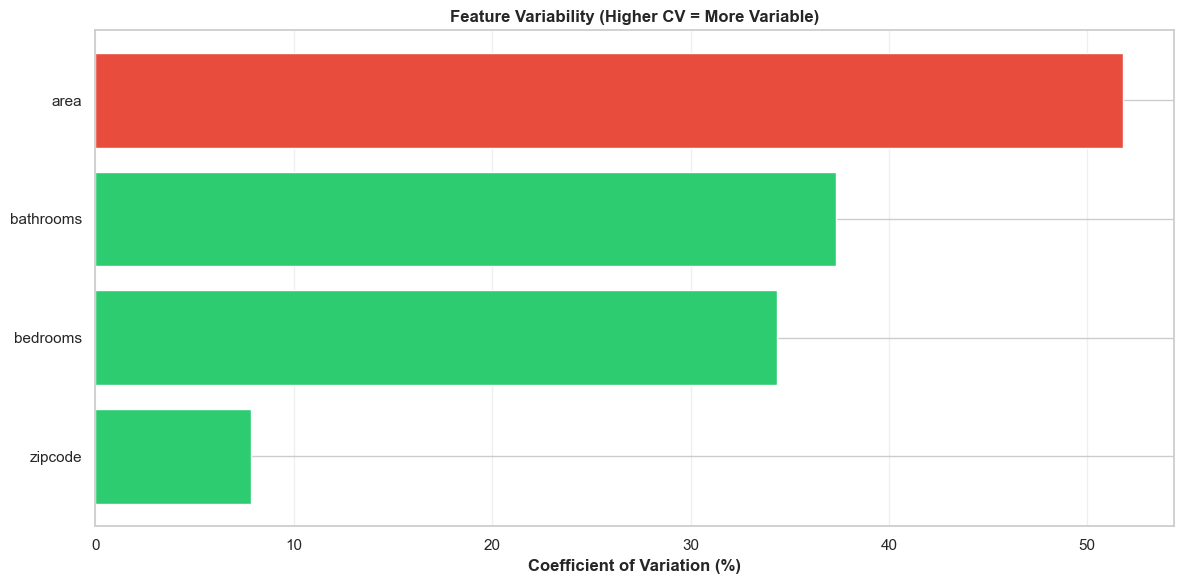

In [17]:
# Feature scaling analysis
feature_stats = pd.DataFrame({
    'Feature': numerical_features,
    'Mean': df[numerical_features].mean().values,
    'Std': df[numerical_features].std().values,
    'Min': df[numerical_features].min().values,
    'Max': df[numerical_features].max().values,
    'Range': (df[numerical_features].max() - df[numerical_features].min()).values,
    'CV (%)': (df[numerical_features].std() / df[numerical_features].mean() * 100).values
})

print("Feature Scaling Analysis (Coefficient of Variation - CV indicates relative variability):")
print(feature_stats.to_string(index=False))

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))
feature_stats_sorted = feature_stats[feature_stats['Feature'] != 'price'].sort_values('CV (%)', ascending=True)
colors = ['#2ecc71' if cv < 50 else '#e74c3c' for cv in feature_stats_sorted['CV (%)']]
ax.barh(feature_stats_sorted['Feature'], feature_stats_sorted['CV (%)'], color=colors)
ax.set_xlabel('Coefficient of Variation (%)', fontweight='bold')
ax.set_title('Feature Variability (Higher CV = More Variable)', fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


## 10. Categorical Feature Analysis (Zipcode)

Although `zipcode` is numeric, it represents categorical location data.
-   **Price by Zipcode**: We analyze how the average price varies across different zipcodes.
-   **Visualization**:
    -   *Boxplot*: Shows price distribution per zipcode.
    -   *Bar Charts*: Compare property counts, average price, and average area across zipcodes.
-   **Insight**: Location is often the most significant driver of real estate prices. Significant variation here suggests `zipcode` should be treated as a categorical feature (e.g., using One-Hot Encoding).


Zipcode Analysis:
         Count  Mean_Price  Median_Price  Std_Price  Min_Price  Max_Price  \
zipcode                                                                     
92276      100   124416.38      105475.0   62029.93      36000     385000   
93510       60   628142.10      549475.0  701402.01     195000    5858000   
93446       54   581401.76      504750.0  426227.83     125000    2395000   
92880       49   559302.55      539800.0   61719.61     448000     749000   
94501       41   814594.46      749000.0  310106.84     339000    1895000   
91901       32   732171.84      684000.0  298832.70      65000    1499000   
92677       26  1051038.35      882000.0  725410.46     324999    3850000   
94531       22   438572.68      452474.5   88667.97     195000     615000   
96019       12   360241.67      239900.0  463089.98      22000    1795000   
85255       12  1082691.67     1039000.0  386617.30     500000    1749000   
81524       11   480418.09      450000.0  123956.80     24

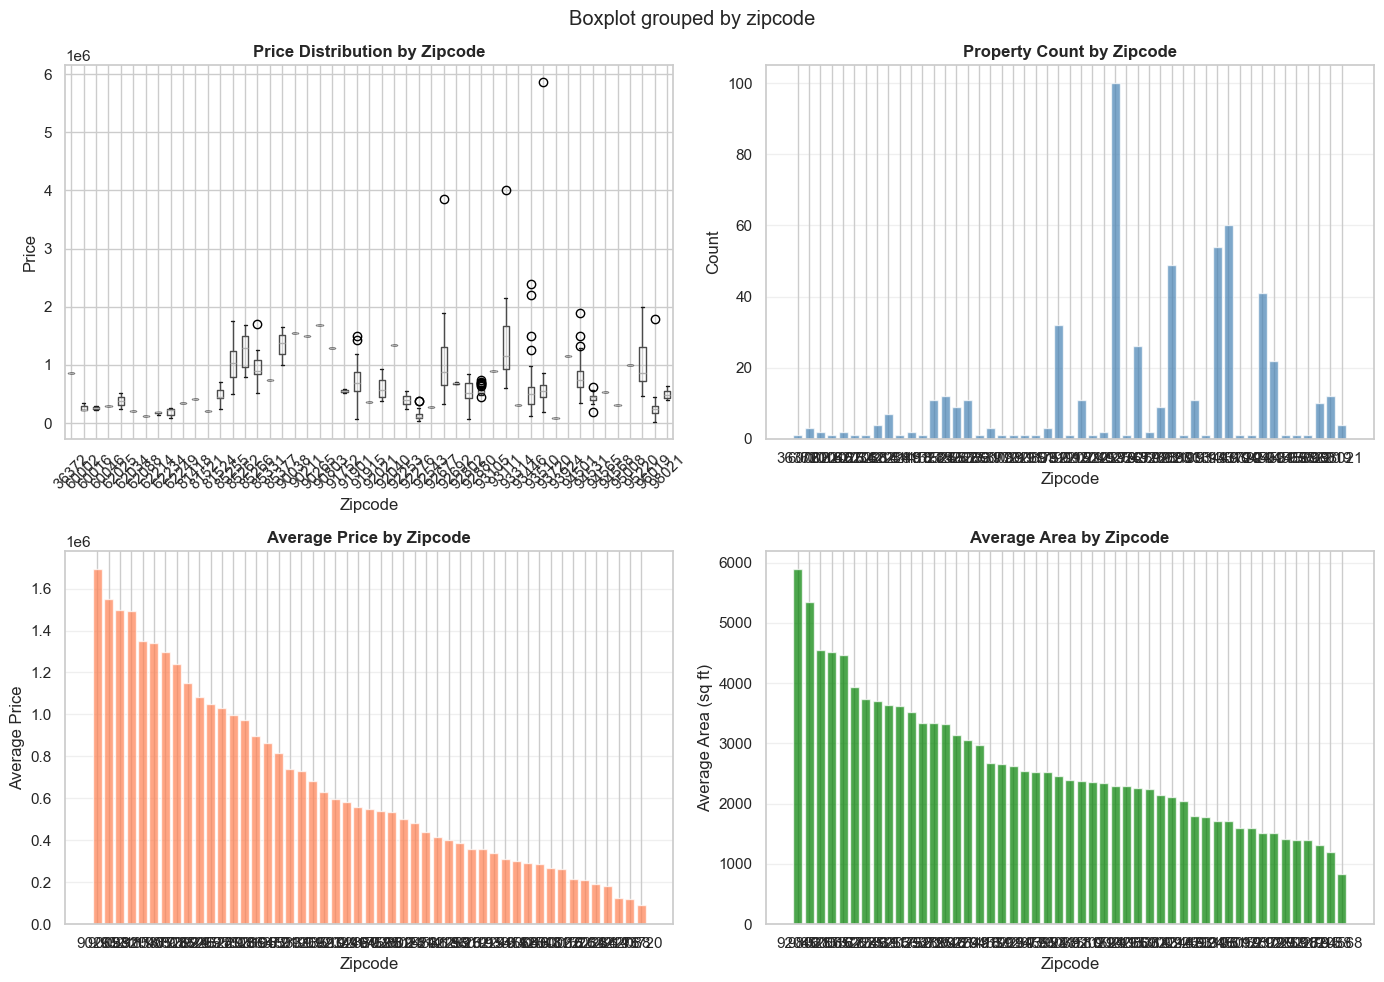

In [18]:
# Zipcode analysis
zipcode_stats = df.groupby('zipcode').agg({
    'price': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'area': 'mean',
    'bedrooms': 'mean',
    'bathrooms': 'mean'
}).round(2)

zipcode_stats.columns = ['Count', 'Mean_Price', 'Median_Price', 'Std_Price', 'Min_Price', 'Max_Price', 
                         'Avg_Area', 'Avg_Bedrooms', 'Avg_Bathrooms']
zipcode_stats = zipcode_stats.sort_values('Count', ascending=False)

print("Zipcode Analysis:")
print(zipcode_stats)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Box plot of price by zipcode
df.boxplot(column='price', by='zipcode', ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution by Zipcode', fontweight='bold')
axes[0, 0].set_xlabel('Zipcode')
axes[0, 0].set_ylabel('Price')
plt.sca(axes[0, 0])
plt.xticks(rotation=45)

# Count by zipcode
zipcode_counts = df['zipcode'].value_counts().sort_index()
axes[0, 1].bar(zipcode_counts.index.astype(str), zipcode_counts.values, color='steelblue', alpha=0.7)
axes[0, 1].set_title('Property Count by Zipcode', fontweight='bold')
axes[0, 1].set_xlabel('Zipcode')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(axis='y', alpha=0.3)

# Average price by zipcode
avg_price = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)
axes[1, 0].bar(avg_price.index.astype(str), avg_price.values, color='coral', alpha=0.7)
axes[1, 0].set_title('Average Price by Zipcode', fontweight='bold')
axes[1, 0].set_xlabel('Zipcode')
axes[1, 0].set_ylabel('Average Price')
axes[1, 0].grid(axis='y', alpha=0.3)

# Average area by zipcode
avg_area = df.groupby('zipcode')['area'].mean().sort_values(ascending=False)
axes[1, 1].bar(avg_area.index.astype(str), avg_area.values, color='green', alpha=0.7)
axes[1, 1].set_title('Average Area by Zipcode', fontweight='bold')
axes[1, 1].set_xlabel('Zipcode')
axes[1, 1].set_ylabel('Average Area (sq ft)')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 11. Pairwise Feature Relationships (Multivariate)

We explore interactions between multiple variables simultaneously to uncover deeper insights.
-   **Color-coded Scatter Plots**:
    -   *Bedrooms vs Price (colored by Area)*: Does a larger area explain high prices for houses with few bedrooms?
    -   *Area vs Price (colored by Bedrooms)*: Do more bedrooms add value for a fixed area?
-   **Feature Engineering**: We create and analyze a new feature, `price_per_sqft`, to see how it varies with bedrooms and location.


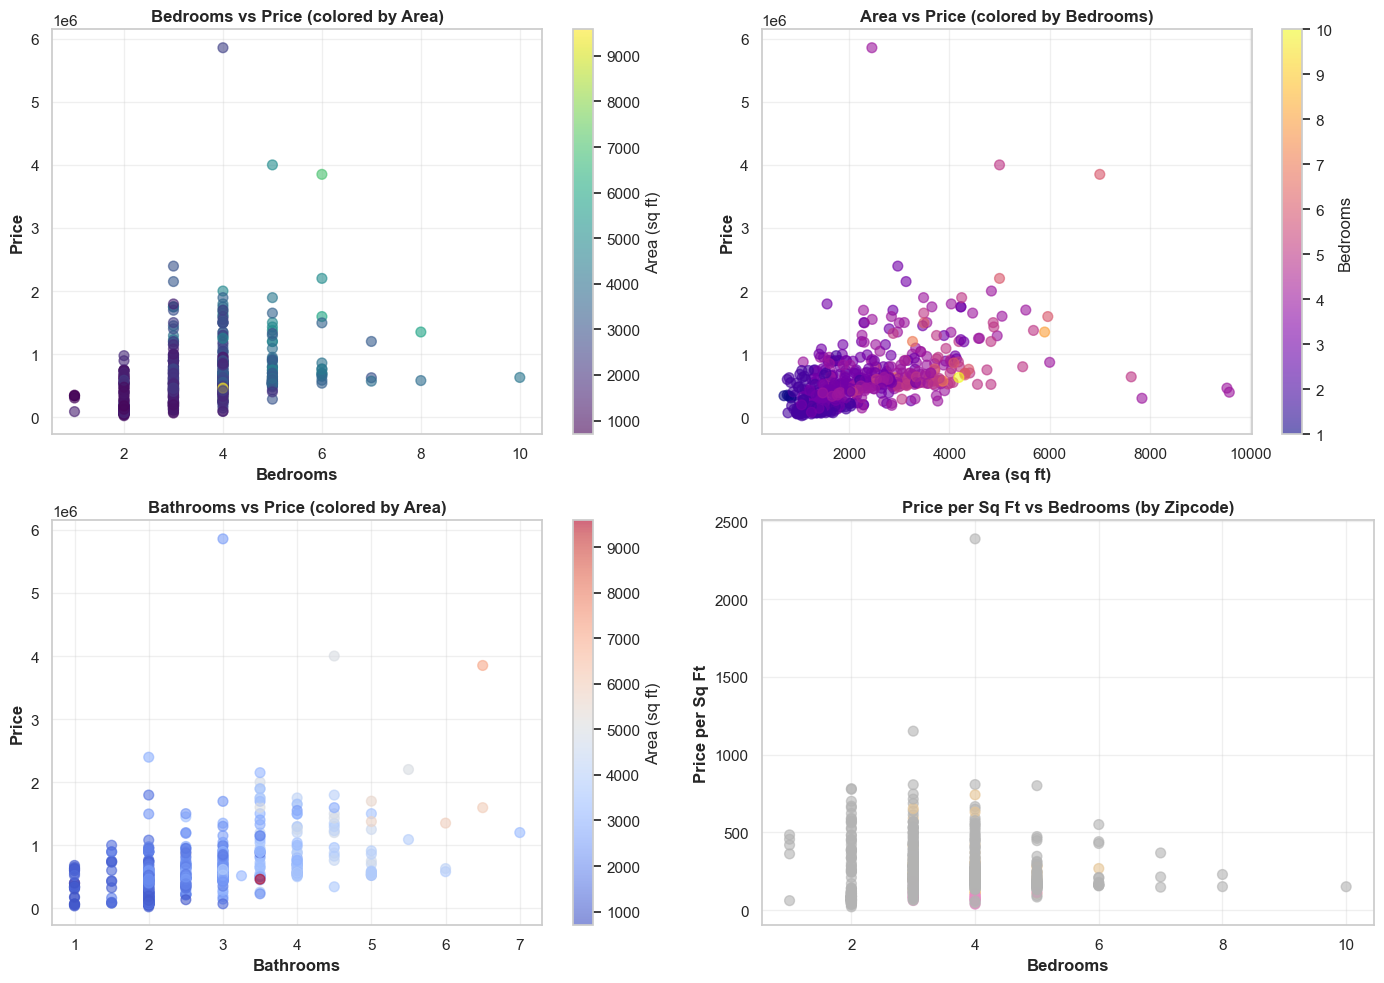


Price per Sq Ft Statistics:
count     535.000000
mean      252.805316
std       186.224972
min        20.833333
25%       138.214036
50%       210.594429
75%       312.083075
max      2387.123064
Name: price_per_sqft, dtype: float64


In [19]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bedrooms vs Price (colored by Area)
scatter1 = axes[0, 0].scatter(df['bedrooms'], df['price'], c=df['area'], 
                             cmap='viridis', alpha=0.6, s=50)
axes[0, 0].set_xlabel('Bedrooms', fontweight='bold')
axes[0, 0].set_ylabel('Price', fontweight='bold')
axes[0, 0].set_title('Bedrooms vs Price (colored by Area)', fontweight='bold')
axes[0, 0].grid(alpha=0.3)
plt.colorbar(scatter1, ax=axes[0, 0], label='Area (sq ft)')

# Area vs Price (colored by Bedrooms)
scatter2 = axes[0, 1].scatter(df['area'], df['price'], c=df['bedrooms'], 
                             cmap='plasma', alpha=0.6, s=50)
axes[0, 1].set_xlabel('Area (sq ft)', fontweight='bold')
axes[0, 1].set_ylabel('Price', fontweight='bold')
axes[0, 1].set_title('Area vs Price (colored by Bedrooms)', fontweight='bold')
axes[0, 1].grid(alpha=0.3)
plt.colorbar(scatter2, ax=axes[0, 1], label='Bedrooms')

# Bathrooms vs Price (colored by Area)
scatter3 = axes[1, 0].scatter(df['bathrooms'], df['price'], c=df['area'], 
                             cmap='coolwarm', alpha=0.6, s=50)
axes[1, 0].set_xlabel('Bathrooms', fontweight='bold')
axes[1, 0].set_ylabel('Price', fontweight='bold')
axes[1, 0].set_title('Bathrooms vs Price (colored by Area)', fontweight='bold')
axes[1, 0].grid(alpha=0.3)
plt.colorbar(scatter3, ax=axes[1, 0], label='Area (sq ft)')

# Price per sq ft vs Bedrooms
df['price_per_sqft'] = df['price'] / df['area']
axes[1, 1].scatter(df['bedrooms'], df['price_per_sqft'], c=df['zipcode'], 
                   cmap='Set2', alpha=0.6, s=50)
axes[1, 1].set_xlabel('Bedrooms', fontweight='bold')
axes[1, 1].set_ylabel('Price per Sq Ft', fontweight='bold')
axes[1, 1].set_title('Price per Sq Ft vs Bedrooms (by Zipcode)', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nPrice per Sq Ft Statistics:")
print(df['price_per_sqft'].describe())


# Executive Summary & Key Findings

Based on the comprehensive Exploratory Data Analysis (EDA) performed on the Houses Dataset, we present the following key insights and recommendations for the modeling phase.

### 1. Data Quality & Completeness
*   **Status**: Excellent.
*   **Finding**: The dataset contains **535 records** with **0 missing values**.
*   **Action**: No imputation is required. The data is ready for immediate use.

### 2. Feature Analysis
*   **Price (Target)**:
    *   The price distribution is **right-skewed**, which is typical for real estate data.
    * We'll Apply a **Log Transformation** to the target variable to normalize the distribution, which will improve the performance of linear models.
*   **Numerical Features (Area, Bedrooms, Bathrooms)**:
    *   All features show **moderate to strong positive correlation** with Price.
    *   **Area** is the strongest predictor.
    *   **Outliers**: A moderate number of outliers were detected using the IQR method. These represent luxury or non-standard properties.

### 3. Location Analysis (Zipcode)
*   **Finding**: There is significant variation in average price across different zipcodes.
*   **Insight**: Location is a primary driver of value.

### 4. Feature Engineering Opportunities
*   **Price per SqFt**: Creating a `price / area` feature reveals value density and helps distinguish between "large but cheap" and "small but expensive" (luxury) properties.
*   **Room Ratio**: A `bedrooms / bathrooms` ratio could indicate the "comfort level" of a house.

*This analysis confirms that the dataset, while small (535 instances), is high-quality and contains strong predictive signals for house price estimation.*
